# Load Packages

In [3]:
import numpy as np

# Task 1: Write a program to implement Needleman-Wunsch for proteins

In [4]:
blosum50 = np.loadtxt('blosum50.txt', dtype=int, skiprows=1, usecols=range(1, 21))
print(blosum50)

ValueError: invalid column index 20 at row 1 with 20 columns

In [ ]:
# map amino acid to index
aa2idx = {aa: idx for idx, aa in enumerate('ARNDCQEGHILKMFPSTWYV')}
print("amino acid 2 index: ",aa2idx)

# map index to amino acid
idx2aa = {idx: aa for idx, aa in enumerate('ARNDCQEGHILKMFPSTWYV')}
print("index 2 acid amino: ",idx2aa)

# get the score of two amino acids
def get_score(aa1, aa2):
    return blosum50[aa2idx[aa1], aa2idx[aa2]]


amino acid 2 index:  {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
index 2 acid amino:  {0: 'A', 1: 'R', 2: 'N', 3: 'D', 4: 'C', 5: 'Q', 6: 'E', 7: 'G', 8: 'H', 9: 'I', 10: 'L', 11: 'K', 12: 'M', 13: 'F', 14: 'P', 15: 'S', 16: 'T', 17: 'W', 18: 'Y', 19: 'V'}


In [ ]:
# implement the Needleman-Wunsch algorithm
def needleman_wunsch(seq1, seq2, gap_penalty=-8):
    # initialize the score matrix
    score = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)
    # initialize the traceback matrix
    traceback = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)
    # initialize the first row and column
    for i in range(1, len(seq1) + 1):
        score[i, 0] = score[i - 1, 0] + gap_penalty
        traceback[i, 0] = 1  # 1 means trace up
    for j in range(1, len(seq2) + 1):
        score[0, j] = score[0, j - 1] + gap_penalty
        traceback[0, j] = 2  # 2 means trace left

    # fill in the score and traceback matrices
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            # calculate match/mismatch score
            match = score[i - 1, j - 1] + get_score(seq1[i - 1], seq2[j - 1])
            # calculate gap scores
            gap1 = score[i - 1, j] + gap_penalty
            gap2 = score[i, j - 1] + gap_penalty
            # choose the best score
            score[i, j] = max(match, gap1, gap2)
            # store the traceback arrow direction
            if score[i, j] == match:
                traceback[i, j] = 3  # 3 means trace diagonal
            elif score[i, j] == gap1:
                traceback[i, j] = 1  # 1 means trace up
            else:
                traceback[i, j] = 2  # 2 means trace left

    return score, traceback

In [ ]:
blosum50_score, blosum50_traceback = needleman_wunsch('PAWHEAE', 'HEAGAWGHEE', gap_penalty=-8)
print(blosum50_score)
print(blosum50_traceback)

[[  0  -8 -16 -24 -32 -40 -48 -56 -64 -72 -80]
 [ -8  -2  -9 -17 -25 -33 -41 -49 -57 -65 -73]
 [-16 -10  -3  -4 -12 -20 -28 -36 -44 -52 -60]
 [-24 -18 -11  -6  -7 -15  -5 -13 -21 -29 -37]
 [-32 -14 -18 -13  -8  -9 -13  -7  -3 -11 -19]
 [-40 -22  -8 -16 -16  -9 -12 -15  -7   3  -5]
 [-48 -30 -16  -3 -11 -11 -12 -12 -15  -5   2]
 [-56 -38 -24 -11  -6 -12 -14 -15 -12  -9   1]]
[[0 2 2 2 2 2 2 2 2 2 2]
 [1 3 3 3 2 3 2 2 2 3 3]
 [1 3 3 3 2 3 2 2 2 2 2]
 [1 1 1 3 3 3 3 2 2 2 2]
 [1 3 3 3 3 3 1 3 3 2 2]
 [1 1 3 2 3 3 3 1 3 3 3]
 [1 1 1 3 2 3 3 3 1 1 3]
 [1 1 3 1 3 3 3 3 3 3 3]]


In [ ]:
# path starting from bottom right corner
good_x = []
good_y = []

def traceback1(traceback, seq1, seq2, i, j):
    if i == 0 and j == 0:
        return
    if traceback[i, j] == 3:
        traceback1(traceback, seq1, seq2, i - 1, j - 1)
        good_x.append(seq1[i - 1])
        good_y.append(seq2[j - 1])
    elif traceback[i, j] == 2:
        traceback1(traceback, seq1, seq2, i, j - 1)
        good_x.append('-')
        good_y.append(seq2[j - 1])
    else:
        traceback1(traceback, seq1, seq2, i - 1, j)
        good_x.append(seq1[i - 1])
        good_y.append('-')

good_x = []
good_y = []
traceback1(blosum50_traceback, 'PAWHEAE', 'HEAGAWGHEE', 7, 10)
print(''.join(good_x))
print(''.join(good_y))



--P-AW-HEAE
HEAGAWGHE-E


In [ ]:
new_score, new_trace = needleman_wunsch('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL','PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY', gap_penalty=-8)
x_len = len('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL')
y_len = len('PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY')

In [ ]:
good_x = []
good_y = []
traceback1(new_trace, 'SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL','PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY', x_len, y_len)
print(''.join(good_x))
print(''.join(good_y))

-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-
PSPTMEAVTSVEA-STASHPHSTSSYFATTYYHLY


# Task 2: Modify your program to implement the Smith-Waterman algorithm

In [ ]:
# implement the Smith-Waterman algorithm
def smith_waterman(seq1, seq2, gap_penalty=-8):
    # initialize the score matrix
    score = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)
    # initialize the traceback matrix
    traceback = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)
    # initialize the best score and its location
    best_score = 0

    # fill in the score and traceback matrices
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            # calculate match/mismatch score
            match = score[i - 1, j - 1] + get_score(seq1[i - 1], seq2[j - 1])
            # calculate gap scores
            gap1 = score[i - 1, j] + gap_penalty
            gap2 = score[i, j - 1] + gap_penalty
            # choose the best score
            score[i, j] = max(0, match, gap1, gap2)
            # store the traceback arrow direction
            if score[i, j] == 0:
                traceback[i, j] = 0  # 0 means end of path
            elif score[i, j] == match:
                traceback[i, j] = 3  # 3 means trace diagonal
            elif score[i, j] == gap1:
                traceback[i, j] = 1  # 1 means trace up
            else:
                traceback[i, j] = 2  # 2 means trace left
            # update the best score and its location
            if score[i, j] > best_score:
                best_score = score[i, j]
                best_loc = (i, j)

    return score, traceback

In [ ]:
score, traceback = smith_waterman('PAWHEAE', 'HEAGAWGHEE', gap_penalty=-8)
print(score)
print(traceback)
print(traceback.shape)
departure = np.unravel_index(np.argmax(score),score.shape)
print(departure)
print(traceback[5, 9])

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  5  0  0  0  0  0]
 [ 0  0  0  0  2  0 20 12  4  0  0]
 [ 0 10  2  0  0  0 12 18 22 14  6]
 [ 0  2 16  8  0  0  4 10 18 28 20]
 [ 0  0  8 21 13  5  0  4 10 20 27]
 [ 0  0  6 13 18 12  4  0  4 16 26]]
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 3 2 2 0 0]
 [0 3 2 0 0 0 1 3 3 2 2]
 [0 1 3 2 0 0 1 1 3 3 3]
 [0 0 1 3 2 3 0 3 1 1 3]
 [0 0 3 1 3 3 2 0 3 3 3]]
(8, 11)
(5, 9)
3


In [ ]:
def traceback2(traceback, seq1, seq2, i, j):
    if traceback[i, j] == 0:
        return
    elif traceback[i, j] == 3:
        traceback2(traceback, seq1, seq2, i - 1, j - 1)
        good_x.append(seq1[i - 1])
        good_y.append(seq2[j - 1])
    elif traceback[i, j] == 2:
        traceback2(traceback, seq1, seq2, i, j - 1)
        good_x.append('-')
        good_y.append(seq2[j - 1])
    else:
        traceback2(traceback, seq1, seq2, i - 1, j)
        good_x.append(seq1[i - 1])
        good_y.append('-')

In [ ]:

good_x = []
good_y = []
traceback2(traceback, 'PAWHEAE','HEAGAWGHEE', departure[0], departure[1])
print(''.join(good_x))
print(''.join(good_y))

AW-HE
AWGHE


In [ ]:
score, traceback = smith_waterman('TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI','MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY', gap_penalty=-8)
x_len = len('TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')
y_len = len('MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY')
departure = np.unravel_index(np.argmax(score),score.shape)
good_x = []
good_y = []
traceback2(traceback, 'TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI','MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY', departure[0], departure[1])
print(''.join(good_x))
print(''.join(good_y))

HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI


# Task 3: We are going to test the BLAST algorithm

In [ ]:
result = open('/Users/royc30ne/Git/comp3212/T2/test3-output.txt', 'r').read()
print(result)

CLUSTAL O(1.2.4) multiple sequence alignment


sp|P63015|PAX6_MOUSE        --------------------------------------------------------MQNS	4
tr|O96791|O96791_DROME      NVIAMRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDEC	60
                                                                                     ::.

sp|P63015|PAX6_MOUSE        HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETG	64
tr|O96791|O96791_DROME      HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI-------------------	101
                            ************.****************************                   

sp|P63015|PAX6_MOUSE        SIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSIN	124
tr|O96791|O96791_DROME      ------------------------------------------------------------	101
                                                                                        

sp|P63015|PAX6_MOUSE        RVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQEGGG	184
tr|O96791|O96791_DROME      --------

# Task 4: Program the following HMM to generate CG rich regions

In [8]:
import random

def hidden_markov_model(num_of_step):

    if random.random() < 0.5:
        return generate_cg_rich(num_of_step, [])
    else:
        return generate_at_rich(num_of_step, [])
    
def generate_cg_rich(num_of_step, seq):
    emission_prob = np.array([0.2459, 0.2079, 0.2478, 0.2984])
    classes = np.array(['A', 'T', 'C', 'G'])
    section = []

    while True:

        if num_of_step == 0:
            seq.append((section, 'CG_rich'))
            return seq
        else:
            section += np.random.choice(a=classes, p=emission_prob)
            num_of_step -= 1

            if np.random.random() < 0.0003:
                seq.append([section, 'CG_rich'])
                break

    return generate_at_rich(num_of_step - 1, seq)

def generate_at_rich(num_of_step, seq):
    emission_prob = np.array([0.2698, 0.3237, 0.2080, 0.1985])
    classes = np.array(['A', 'T', 'C', 'G'])
    section = []

    while True:

        if num_of_step == 0:
            seq.append((section, 'AT_rich'))
            return seq
        else:
            section += np.random.choice(a=classes, p=emission_prob)
            num_of_step -= 1

            if np.random.random() < 0.0002:
                seq.append([section, 'AT_rich'])
                break

    return generate_cg_rich(num_of_step - 1, seq)

In [9]:
result = hidden_markov_model(20000)
og_seq = "".join(["".join(i[0]) for i in result])
print(og_seq)
for code, state in result:
    print(state)


ACTGACTACACCTCATTAACGATGCAATGAGACGCTCCAGTTCCGACAGATGCAATCGCTGGGTAGGCAACACACCTAGGATACCAAATCATCGTATTATAAACAAGACGTTAAGTTACTAAAGCATTATCGAGGGCATTGTTAAAGATGTATGCACCGTCACTTTTTCCGCCATATTAGAGTACTCACCATAGTGACGCACATGACAAGTGCTTTACTTACACGCATAGAATTGGTTTCAGTTAGATGTTTTGTCCTTCAATGACGTCCTATCATCTGAGTAGATCTTTGCAACTATGTGGAAACGCTCATACGCAGTCATAATATAATCACACATTGTTTTAATTTATTAGTGAATCAAAATGGAATGACCGAAGGGTGAAGTCTATTCTTTTAGCTAAGAGTTCTTCTTTTGGATGCAGGATGAATGTCTTCTGATACACCCGTTTGTAATTAACAAGTTTCTTTTTTGATGTGGTGGAACTGAGACGCCTATATACGTGTTACATTGTGAAACCACAGTGTAATGCCCAAGGTTTGTCGAGGGATTCATGATATTTGGTTTCCATATCTCGGATCTACGGGTAACGGCATAGTAGGAAGTCTTTTATCTAATCAATGTCGTAAACGATCGATCGTTTACGGGGATGTCTTGTCATCACCAATCTGATATGGGTTAGTTTCCCCTTGTAAGTTTTCGGCCAAATTTGTTTACTAGTCCCCCCACGAACCTAAATTTAAAAACTAGTGGTATTGCTAACGTGTTATACGCTAAAACCCCTTTTATTTCAAGGAAGTTAATGGGGCGGTGTTATAGTCTTTGCGGATTTATTTGTAGTGTTAGGGCGAATCGTTCATTTGCACTTAAATCGGTAAATCGATAAATGCCGTTACCCTGCTCCGCCCTCAGCAGTTTAAGGTACAGGGAATACTAGGATTAGTCGTGTCCTAGGAGAGTAGGTTAAAATTAAATTTCGATGGCCTGTAGTACACATTCTTA

# Task 5 Write a viterbi algorithm for finding the most likely CG regions and find a way of drawing this

In [5]:
import tensorflow as tf

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Define the HMM parameters
states = ('AT rich', 'CG rich')
observations = ('A', 'T', 'C', 'G')
start_prob = np.array([0.5, 0.5])  # Initial state probabilities
AG_stay = 0.9998
AT_2_CG = 0.0002
CG_stay = 0.9997
CG_2_AT = 0.0003
trans_prob = np.array([[0.0002, 0.9998], [0.0003, 0.9997]])  # Transition probabilities
emit_prob = np.array([[0.2459, 0.2079, 0.2478, 0.2984], [0.2698, 0.3237, 0.2080, 0.1985]])  # Emission probabilities


def viterbi(sequence):
    CG_cumulative_prob, AT_cumulative_probs = viterbi_forward(sequence)
    # print("viterbi_forward")
    # print(CG_cumulative_prob)  
    # print(AT_cumulative_probs)
    return viterbi_backward(CG_cumulative_prob, AT_cumulative_probs)
    
# Define the Viterbi algorithm function
def viterbi_forward(obs):
    # Initialize the Viterbi matrix and the backpointers
    at_cumulative = [(0, 'endpoint')]
    cg_cumulative = [(0, 'endpoint')]

    # forward broadcast
    for char in obs:

        og_at_value = at_cumulative[-1][0]
        og_cg_value = cg_cumulative[-1][0]

        at_max, at_og_state = max([(og_at_value + np.log(AG_stay),"stay_same"),(og_cg_value + np.log(CG_2_AT),"from_other")], key = lambda tup: tup[0])
        cg_max, cg_og_state = max([(og_cg_value + np.log(CG_stay),"stay_same"),(og_at_value + np.log(AT_2_CG),"from_other")], key = lambda tup: tup[0])

        at_cumulative.append((at_max + np.log(emit_prob[0,observations.index(char)]), at_og_state))
        cg_cumulative.append((cg_max + np.log(emit_prob[1,observations.index(char)]), cg_og_state))
        
    return at_cumulative, cg_cumulative

def cg_state(i, acc, cg_cumulative_probs, at_cumulative_probs):
    while True:
        acc = "C" + acc
        if(i == 0): return acc
        if(not cg_cumulative_probs[i][1] == "stay_same"):
            i -= 1
            break
        else:
            i -= 1
    return at_state(i, acc, cg_cumulative_probs, at_cumulative_probs)
    
def at_state(i, acc, cg_cumulative_probs, at_cumulative_probs):
    while True:
        acc = "A" + acc
        if(i == 0): return acc
        if(not at_cumulative_probs[i][1] == "stay_same"):
            i -= 1
            break
        else:
            i -= 1
    return cg_state(i, acc, cg_cumulative_probs, at_cumulative_probs)
    
def viterbi_backward(cg_cumulative_probs, at_cumulative_probs):
    
    #the index we start from, both lists are of the same length
    index = len(cg_cumulative_probs) - 1
    
    #start in the state that has the greatest cumulative likelihood
    if(cg_cumulative_probs[-1][0] > at_cumulative_probs[-1][0]):
        return cg_state(index, "", cg_cumulative_probs, at_cumulative_probs)
    else:
        return at_state(index, "", cg_cumulative_probs, at_cumulative_probs)


In [12]:
decoded_sections = viterbi(og_seq)
print(decoded_sections)

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [ ]:
# Define the Viterbi algorithm function
example_seq = '5466'
observations2 = ('1','2','3','4', '5', '6')
def viterbi_forward2(obs):
    # Initialize the Viterbi matrix and the backpointers
    at_cumulative = [(.0, 'endpoint')]
    cg_cumulative = [(float("-inf"), 'endpoint')]
    stay_same = 0.9
    to_other = 0.1
    emit_prob2 = np.array([[0.1667,0.1667,0.1667,0.1667,0.1667,0.1667], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])  # Emission probabilities

    # forward broadcast
    for char in obs:

        og_at_value = at_cumulative[-1][0]
        og_cg_value = cg_cumulative[-1][0]

        at_max, at_og_state = max([(og_at_value + np.log(stay_same),"stay_same"),(og_cg_value + np.log(to_other),"from_other")], key = lambda tup: tup[0])
        cg_max, cg_og_state = max([(og_cg_value + np.log(stay_same),"stay_same"),(og_at_value + np.log(to_other),"from_other")], key = lambda tup: tup[0])

        at_cumulative.append((at_max + np.log(emit_prob2[0,observations2.index(char)]), at_og_state))
        cg_cumulative.append((cg_max + np.log(emit_prob2[1,observations2.index(char)]), cg_og_state))
        
    return at_cumulative, cg_cumulative

# Define the Viterbi algorithm function

In [ ]:
chain1, chain2 = viterbi_forward2(example_seq)
print(chain1)
print(chain2)

[(0.0, 'endpoint'), (-1.896920004883215, 'stay_same'), (-3.7938400097664298, 'stay_same'), (-5.690760014649645, 'stay_same'), (-7.5876800195328595, 'stay_same')]
[(-inf, 'endpoint'), (-4.605170185988091, 'from_other'), (-6.502090190871305, 'from_other'), (-6.789572283320421, 'from_other'), (-7.588079979538192, 'stay_same')]


In [10]:
def get_section_info(input):
    
    if(type(input[0]) is tuple):
        return list(map(lambda tup: (len(tup[0]), tup[1]), input))
    else:
        i = 0
        sections = []
        while i < len(input):
            print("curr: ", i, "total: ", len(input))
            if input[i] == 'A':
                size = 0
                while i < len(input) and input[i] == 'A':
                    size += 1
                    i += 1
                sections.append((size, "AT_rich"))
                continue
            if input[i] == 'C':
                size = 0
                while i < len(input) and input[i] == 'C':
                    size += 1
                    i += 1
                sections.append((size, "CG_rich"))
        return sections

In [ ]:
#The original tuples generated by the HMM
og_info = [(len(i[0]), i[1]) for i in result]
og_info

[(1397, 'AT_rich'),
 (2915, 'CG_rich'),
 (3594, 'AT_rich'),
 (533, 'CG_rich'),
 (7826, 'AT_rich'),
 (868, 'CG_rich'),
 (885, 'AT_rich'),
 (1922, 'CG_rich'),
 (52, 'AT_rich')]

In [ ]:
decoded_info = get_section_info(decoded_sections)
decoded_info

curr:  0 total:  19993
curr:  1365 total:  19993
curr:  4339 total:  19993
curr:  7944 total:  19993
curr:  8444 total:  19993
curr:  16271 total:  19993
curr:  17117 total:  19993
curr:  18022 total:  19993


[(1365, 'AT_rich'),
 (2974, 'CG_rich'),
 (3605, 'AT_rich'),
 (500, 'CG_rich'),
 (7827, 'AT_rich'),
 (846, 'CG_rich'),
 (905, 'AT_rich'),
 (1971, 'CG_rich')]

## Visualization

In [ ]:
def gen_colour_arr(tups):
    states = list(map(lambda tup: tup[1], tups))
    colours = []
    for state in states:
        if state == "AT_rich":
            colours.append("orange")
        else:
            colours.append("green")
    return colours

#get the start x positions (left) for each of the rectangles
def get_x_poses(tuples):
    y_pos_arr = [0]
    for i in range(len(tuples) - 1):
        y_pos_arr.append(tuples[i][0] + y_pos_arr[-1])
    return y_pos_arr

def visualize(label, tuples):
    phage_widths = list(map(lambda x: x[0], tuples))
    phage_lefts = get_x_poses(tuples)
    phage_colors = gen_colour_arr(tuples)
    phage_centers = []
    for i in range(len(phage_widths)):
        phage_centers.append((phage_widths[i] / 2) + phage_lefts[i])
    fig, ax = plt.subplots(figsize = (20,2))
    ax.barh([label],
        phage_widths, left = phage_lefts, color = phage_colors)
    for i in range(len(phage_centers)):
            ax.text(phage_centers[i], 0, phage_widths[i], ha = "center", va = "center", color = "white",
                    fontsize = "medium", fontweight = "bold")
    ax.get_xaxis().set_visible(False)        
    ax.title.set_text("Visualization of decoded AT-rich/CG-rich regions")

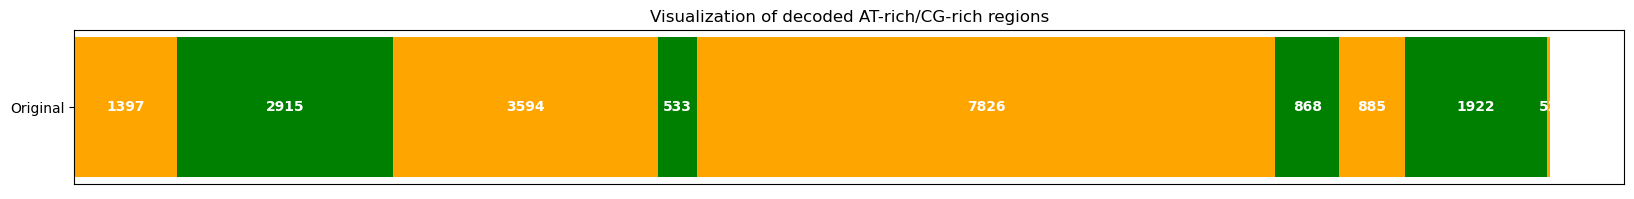

In [ ]:
visualize("Original",og_info)

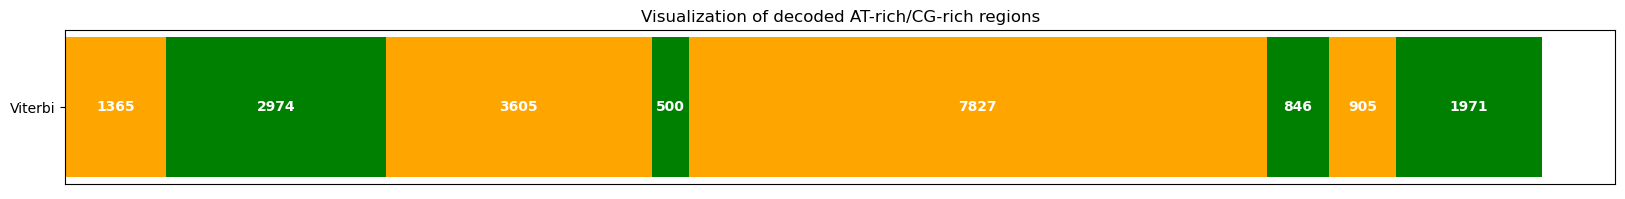

In [ ]:
visualize("Viterbi",decoded_info)

# Task 6 Run this on the genome for the Lambda Phage or here

In [ ]:
phaseLambda = open("phaseLambda.fasta.txt", "r").read().splitlines()
phaseLambda = "".join(phaseLambda)
print(phaseLambda)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

In [ ]:
viterbi_decode = viterbi(phaseLambda)
viterbi_decode

'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

In [ ]:
tuples = get_section_info(viterbi_decode)
tuples

curr:  0 total:  48503
curr:  177 total:  48503
curr:  22500 total:  48503
curr:  31225 total:  48503
curr:  33187 total:  48503
curr:  38366 total:  48503
curr:  46494 total:  48503


[(177, 'AT_rich'),
 (22323, 'CG_rich'),
 (8725, 'AT_rich'),
 (1962, 'CG_rich'),
 (5179, 'AT_rich'),
 (8128, 'CG_rich'),
 (2009, 'AT_rich')]

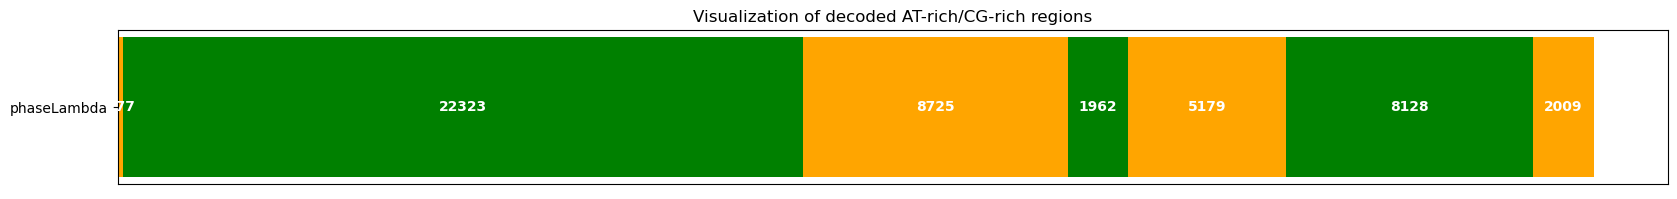

In [ ]:
visualize("phaseLambda",tuples)